Number of complaint posts: 431


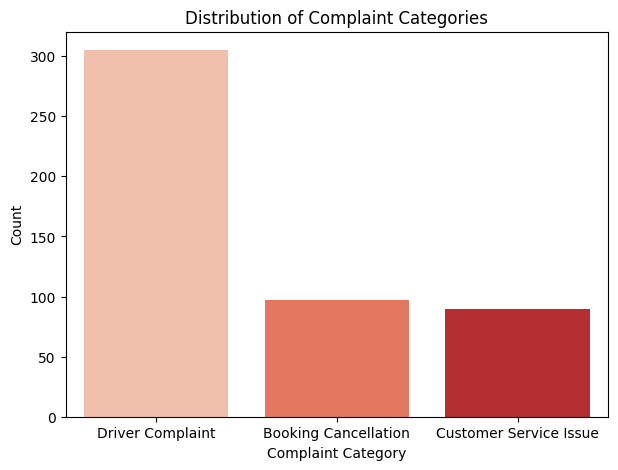

In [5]:
# Replace 'ola.json' with your actual file path if needed
# Data handling
import json
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment analysis (TextBlob)
# !pip install textblob --quiet  # run this only once in a notebook cell to install
from textblob import TextBlob

# For handling the mode calculation
from statistics import mode

# (Optional) to suppress warnings in a notebook
import warnings
warnings.filterwarnings('ignore')
file_path = 'ola.json'
with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)
driver_keywords = ['driver', 'drivers']
booking_keywords = ['cancel', 'cancellation', 'cancelled', 'booking']
service_keywords = ['customer care', 'customer service', 'service issue', 'customer support']
def find_complaint_categories(text):
    text_lower = text.lower()
    categories = []
    
    if any(word in text_lower for word in driver_keywords):
        categories.append('Driver Complaint')
    if any(word in text_lower for word in booking_keywords):
        categories.append('Booking Cancellation')
    if any(word in text_lower for word in service_keywords):
        categories.append('Customer Service Issue')
    
    if len(categories) == 0:
        return None
    else:
        return categories

df['complaint_categories'] = df['content'].apply(find_complaint_categories)
complaints_df = df[df['complaint_categories'].notnull()].copy()
print("Number of complaint posts:", complaints_df.shape[0])
complaints_df[['tweet_id', 'content', 'complaint_categories']].head()
from collections import Counter

all_complaints = []
for cat_list in complaints_df['complaint_categories']:
    all_complaints.extend(cat_list)

complaint_counter = Counter(all_complaints)
labels = list(complaint_counter.keys())
counts = list(complaint_counter.values())

plt.figure(figsize=(7,5))
sns.barplot(x=labels, y=counts, palette='Reds')
plt.title("Distribution of Complaint Categories")
plt.xlabel("Complaint Category")
plt.ylabel("Count")
plt.show()
